In [1]:
# demo code for high quality text detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from tqdm import tqdm
import string
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86183\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\86183\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
csv_path = '../../data/telegram/scrape.telegram_forwardsRT30.csv'
df_telegram = pd.read_csv(csv_path)
df_telegram_copy = df_telegram.copy()

df_head_copy = df_telegram_copy.head()
print(df_head_copy)

                            chat      country state city  views  forwards  \
0  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   7159        42   
1  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   6026        50   
2  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   3617        58   
3  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN  10435        76   
4  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   4374        61   

   replies                                        messageText predicted_class  \
0      124  👋Вітаємо на каналі КОРИСНО (HELPFUL) Швейцарсь...    Volunteering   
1       31  Які пропозиції підтримки є у Вашому кантоні? \...    Volunteering   
2        2  Як оформити самозайнятість в Швейцарії зі стат...     Integration   
3      296  Дорогі учасники групи,\n\nРаді оголосити, що д...    Volunteering   
4        8  🔸Статус захисту S надає право працювати у Швей...    Volunteering   

  messageDate  
0  2022-07-14  
1  2023-05-22  
2 

range1: (31.00, 122.41), count: 1727.0
range2: (122.41, 474.92), count: 641.0
range3: (474.92, 1834.35), count: 192.0
range4: (1834.35, 7076.98), count: 61.0
range5: (7076.98, 27295.00), count: 15.0


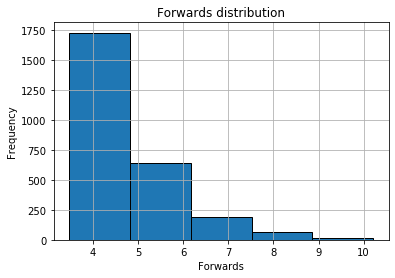

In [3]:
forwards_data = df_telegram_copy['forwards']
forwards_data_log = np.log1p(forwards_data)
counts, bin_edge, _ = plt.hist(forwards_data_log, bins=5, edgecolor='k')
plt.xlabel('Forwards')
plt.ylabel('Frequency')
plt.title('Forwards distribution')
plt.grid(True)

# print range and number
for i in range(len(counts)):
    start = bin_edge[i]
    end = bin_edge[i+1]
    start_ = np.expm1(start)
    end_ = np.expm1(end)
    count = counts[i]
    print(f"range{i+1}: ({start_:.2f}, {end_:.2f}), count: {count}")

plt.show()

数据清洗

In [4]:
# stopwords, add ukrainian stopwords from .txt file
stopWords = stopwords.words('english') 
for word in stopwords.words('german'):
    stopWords.append(word)
for word in stopwords.words('french'):
    stopWords.append(word)
for word in stopwords.words('italian'):
    stopWords.append(word)
for word in stopwords.words('russian'):
    stopWords.append(word)
with open("../../data/stopwords/stopwords_ua.txt") as file: #add ukrainian stopwords loaded from .txt file
    ukrstopWords = [line.rstrip() for line in file]
for stopwords in ukrstopWords:
    stopWords.append(stopwords)

In [5]:
print(df_telegram_copy['messageText'][0])

# removing stopwords
def remove_stopwords(text):
    if len(text) > 50:
        new_text = []
        for word in text.split():
            if word in stopWords:
                continue
            else:
                new_text.append(word)
        return ' '.join(new_text)
    else:
        return text

# removing HTML Tags
def remove_html(text):
    if len(text) > 50:
        remove_ = re.compile('<.*?')
        return re.sub(remove_, r'', text)
    else:
        return text

# removing URLs
def remove_url(text):
    if len(text) > 50:
        re_url = re.compile('https?://\S+|www\.\S+')
        return re_url.sub('', text)
    else:
        return text

# removing emojis, from git
def remove_emojis(text):
    if len(text) > 50:
        emoji_pattern = re.compile(pattern="["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U00002702-\U000027B0"  # Dingbats
            u"\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

# lowercasing
def convert_lowercase(text):
    if len(text) > 50:
        text = text.lower()
        return text
    else:
        return text

# removing punctuation
def remove_punctuation(sentences):
    cleaned_sentences = []
    translator = str.maketrans('', '', string.punctuation)
    for sentence in sentences:
        cleaned_sentence = sentence.translate(translator)
        cleaned_sentences.append(cleaned_sentence)
    return cleaned_sentences

# tokenization 
def tokenize(text):
    if len(text) > 50:
        text = text.replace("\n", " ")
        text = sent_tokenize(text)
        return text
    else:
        return text

df_telegram_copy['messageText'] = df_telegram_copy['messageText'].apply(remove_stopwords).apply(remove_html).apply(remove_url).apply(remove_emojis).apply(convert_lowercase).apply(tokenize).apply(remove_punctuation)

print(df_telegram_copy['messageText'][0])

👋Вітаємо на каналі КОРИСНО (HELPFUL) Швейцарського Червоного Хреста.\nМи — група волонтерів, яка допоможе вам знайти відповіді на ваші запитання. Ми намагаємось відповідати впродовж 24 годин. Відповіді на запитання надаються з понеділка по п’ятницю. \n\nПерш ніж поставити своє запитання, просимо вас спочатку переглянути веб-сайт КОРИСНО (HELPFUL): helpful.redcross.ch\n\nНа цьому каналі можна використовувати українську, російську, англійську та державні мови Швейцарії. Ми відповідатимемо здебільшого державними мовами Швейцарії та пропонуватимемо перекласти наші відповіді. Для цього скористайтеся функцією «перекладу», яку пропонує Telegram. Указівки та коментарі наведено нижче.\n\n⚠️Оскільки це публічний канал, ваші коментарі бачитимуть всі бажаючі.\nЯкщо у вас є запитання, що передбачає розкриття особистої інформації, просимо вас додати в коментарі значок ✉️.\nТоді ми надішлемо вам приватне повідомлення в зашифрованому чаті.\n\n📍Відповіді на деякі питання були надані в приватних повідом

手动划分标签

In [6]:
threshold_quality = 2500
df_telegram_copy['label'] = df_telegram_copy['forwards'].apply(lambda x: 1 if x >= threshold_quality else 0)

pytorch regression

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, AdamW, BertModel
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

df_clean = pd.read_csv('../../data/telegram/preproceed_data.csv')
# devide training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(df_clean['messageText'], df_clean['forwards'], test_size=0.2, random_state = 24)

# tokenize with pretrained model
max_length = 1024
tokenizer = BertTokenizer.from_pretrained("bert-base-ukrainian-cased")
X_train_encode = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length, return_tensors="pt")
X_val_encode = tokenizer(list(X_val), truncation=True, padding=True, max_length=max_length, return_tensors="pt")

train_dateset = TensorDataset(X_train_encode["input_ids"], X_train_encode["attention_mask"], torch.tensor(y_train.values, dtype=torch.float32))
val_dataset = TensorDataset(X_val_encode["input_ids"], X_val_encode["attention_mask"], torch.tensor(y_val.values, dtype=torch.float32))

batch_size = 32
train_loader = DataLoader(train_dateset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# regression model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-ukrainian-cased")
        self.dropout = nn.Dropout(0.2)
        self.linear = nn.Linear(768, 1)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids, attention_mask=attention_mask)
        output = output.pooler_output
        output = self.dropout(output)
        logits = self.linear(output)
        return logits

model = RegressionModel()

Loss = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# train model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
epochs = 5

def train_model(epochs, train_loader, val_loader):
    training_loss = []
    validating_loss = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = Loss(outputs.squeeze(1), labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        training_loss.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

        # evaluate model
        model.eval()
        val_loss = 0.0
        predictions = []

        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
                
                outputs = model(input_ids, attention_mask)
                loss = Loss(outputs.squeeze(1), labels)
                val_loss += loss.item()
                
                predictions.extend(outputs.cpu().squeeze(1).numpy())

        val_loss /= len(val_loader)
        validating_loss.append(val_loss)
        print(f"Validation Loss: {val_loss:.4f}")

        # evaluation matrics
        predictions = np.array(predictions)
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)

        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
    
    return model, training_loss, validating_loss, predictions

def plot_loss(training_loss, validating_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', marker='o')
    plt.plot(range(1, len(validating_loss) + 1), validating_loss, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_scatter(y_val, predictions):
    predictions = np.array(predictions)
    y_val = np.array(y_val)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, predictions, c='blue', alpha=0.5)
    plt.title('Scatter Plot of Predictions vs Real Values')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5, Loss: 2945318.2323
Validation Loss: 994527.0432
Mean Squared Error: 995865.5656
Mean Absolute Error: 302.3334
Epoch 2/5, Loss: 2927516.3415
Validation Loss: 991992.1431
Mean Squared Error: 993329.6759
Mean Absolute Error: 298.1050
Epoch 3/5, Loss: 2925007.2335
Validation Loss: 990410.0837
Mean Squared Error: 991747.0969
Mean Absolute Error: 295.4382
Epoch 4/5, Loss: 2924161.7178
Validation Loss: 989088.2758
Mean Squared Error: 990424.7768
Mean Absolute Error: 293.1920
Epoch 5/5, Loss: 2921691.3137
Validation Loss: 987838.1685
Mean Squared Error: 989174.2008
Mean Absolute Error: 291.0512


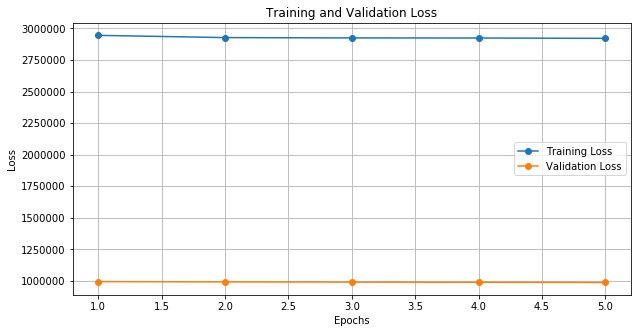

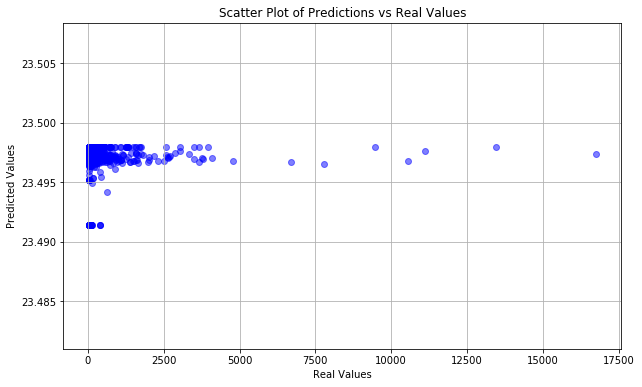

In [12]:
# train model
model_bert_32_5, training_loss, validating_loss, predictions = train_model(epochs, train_loader, val_loader)

# plot
plot_loss(training_loss, validating_loss)
plot_scatter(y_val, predictions)

In [9]:
torch.save(model_bert_32_5.state_dict(), 'bert_regression_model_01.pth')